# Predict traffic with Prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from prophet import Prophet

In [3]:
df = pd.read_csv("data/fr.wikipedia.org_20190220-20230221_pageviews.csv")
df.head()

Date  fr.wikipedia.org
0  2019-02-20          24204230
1  2019-02-21          23372675
2  2019-02-22          22845651
3  2019-02-23          21805707
4  2019-02-24          24478639

Create a training DF on most historical data. We'll keep the freshest dates to check prediction accuracy.

In [6]:
train = df[df['Date'] < '2023-02-01']
train = train.rename({'Date': 'ds', 'fr.wikipedia.org': 'y'}, axis=1)
train

ds         y
0     2019-02-20  24204230
1     2019-02-21  23372675
2     2019-02-22  22845651
3     2019-02-23  21805707
4     2019-02-24  24478639
...          ...       ...
1437  2023-01-27  24114728
1438  2023-01-28  23866897
1439  2023-01-29  27464952
1440  2023-01-30  28099626
1441  2023-01-31  24632907

[1442 rows x 2 columns]

Create and train the model

In [7]:
m = Prophet()
m.fit(train)

17:27:28 - cmdstanpy - INFO - Chain [1] start processing
17:27:30 - cmdstanpy - INFO - Chain [1] done processing


Prepare list of dates to predict values.

In [9]:
future = m.make_future_dataframe(periods=60)
future.tail()

ds
1497 2023-03-28
1498 2023-03-29
1499 2023-03-30
1500 2023-03-31
1501 2023-04-01

Actual forecasting.

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1497 2023-03-28  3.403423e+07  3.186761e+07  3.617714e+07
1498 2023-03-29  3.404579e+07  3.202684e+07  3.618489e+07
1499 2023-03-30  3.370772e+07  3.153861e+07  3.569142e+07
1500 2023-03-31  3.322452e+07  3.106670e+07  3.527693e+07
1501 2023-04-01  3.348476e+07  3.142333e+07  3.545128e+07

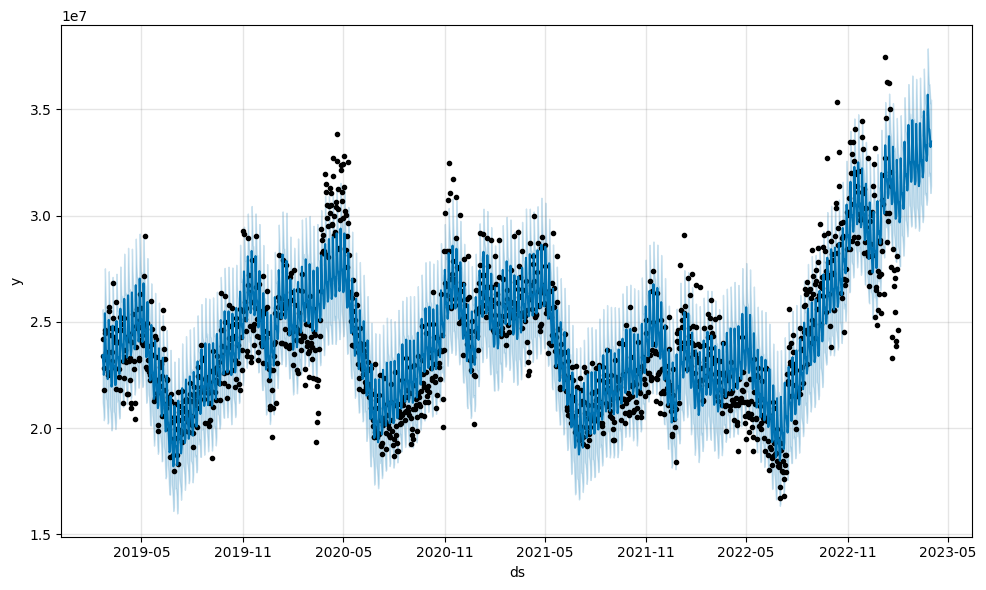

In [14]:
fig = m.plot(forecast)

Analyse components & trends.

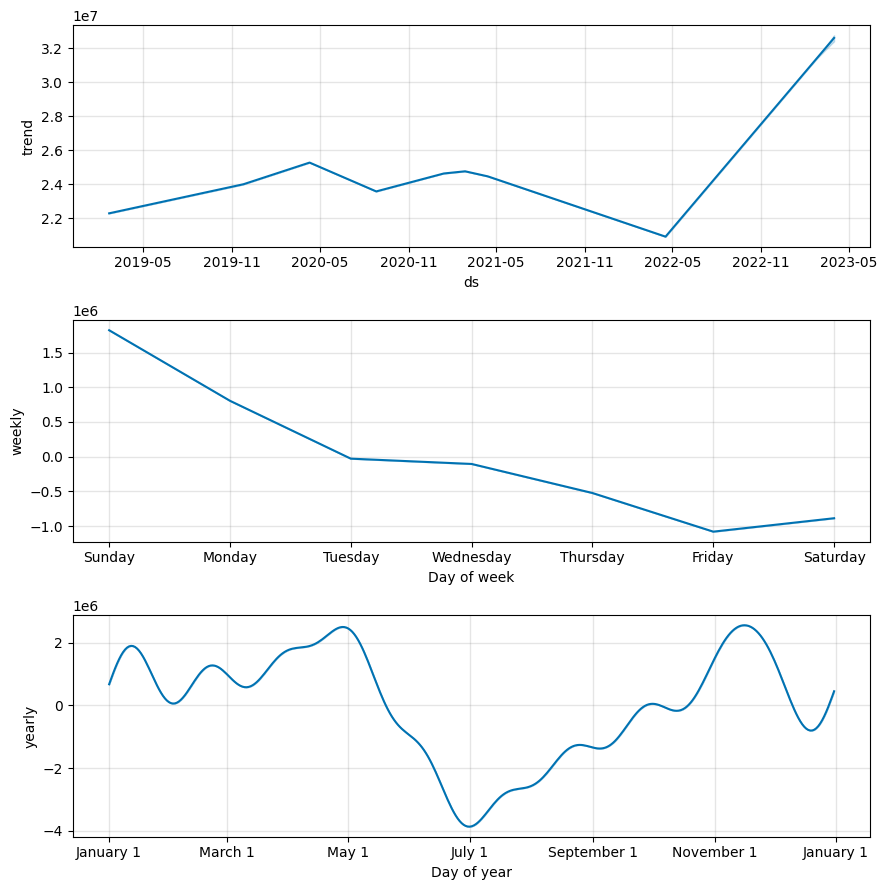

In [13]:
fig = m.plot_components(forecast)

In [15]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [21]:
plot_components_plotly(m, forecast)

Compare forecast & real data

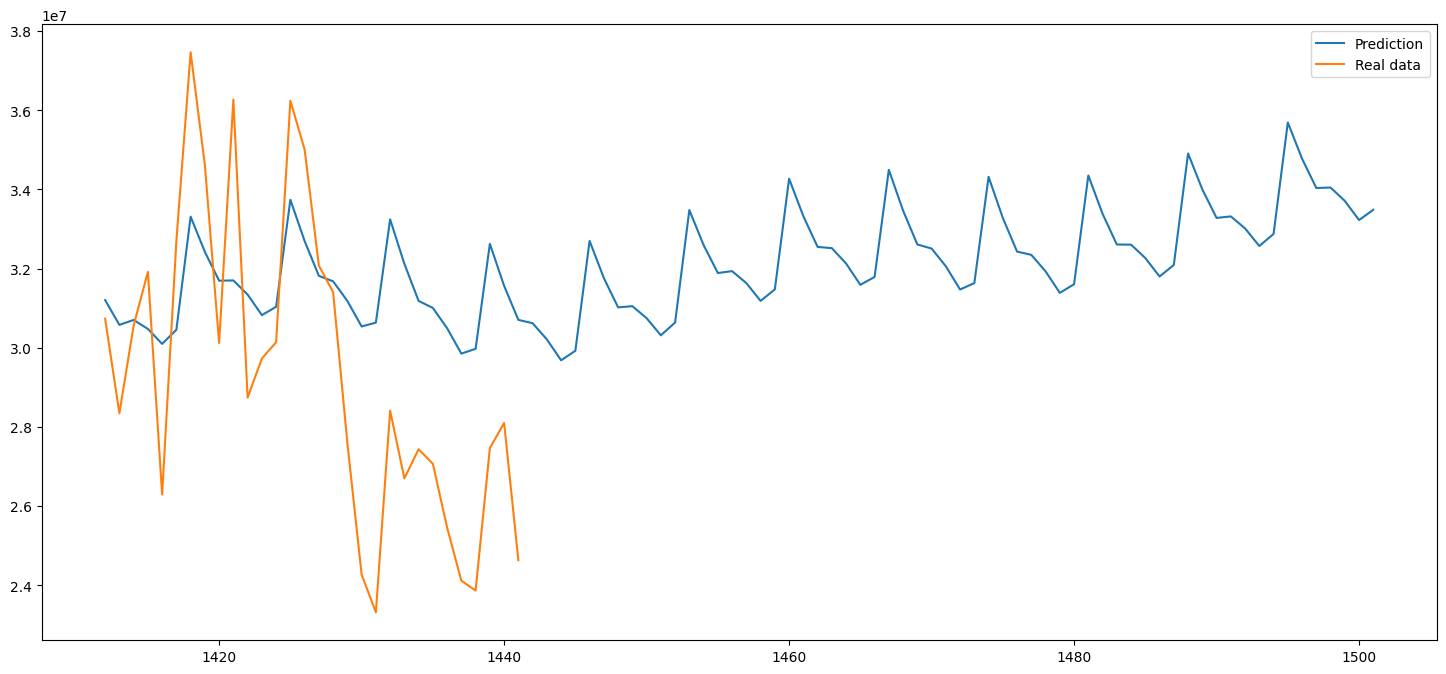

In [20]:
ax = forecast[forecast.ds > "2023-01-01"][["ds", "yhat"]][["yhat"]].plot(figsize=[18,8])
train[train.ds > "2023-01-01"]["y"].plot(ax=ax)
plt.legend(["Prediction", "Real data"])

More analysis: changepoints.

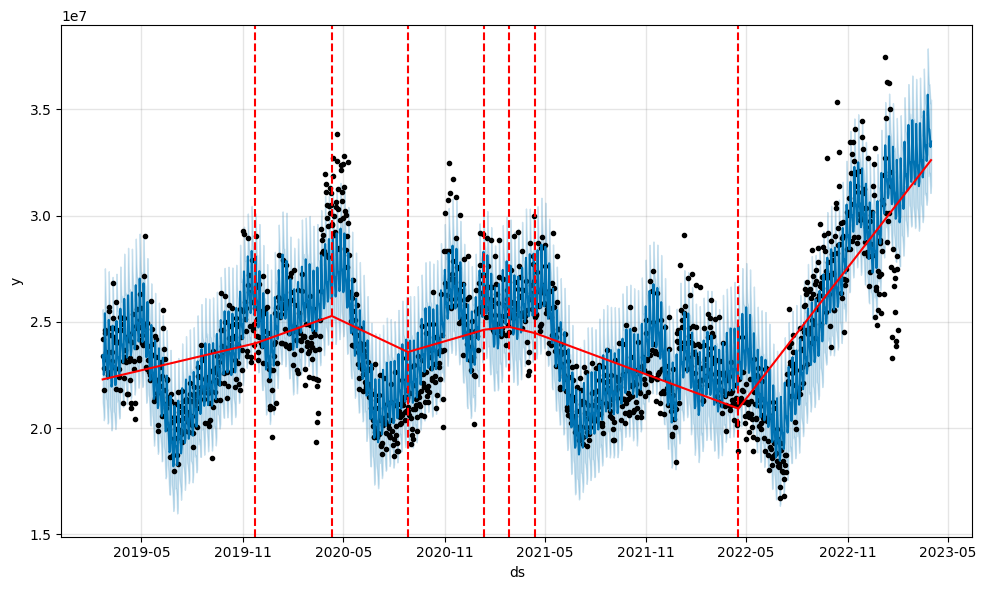

In [24]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)